In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

# Project
## International Airlines Traffic By City Pairs ML Analysis 

In [2]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\city_pairs.csv")

# Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89320 entries, 0 to 89319
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   89320 non-null  object 
 1   AustralianPort          89320 non-null  object 
 2   ForeignPort             89320 non-null  object 
 3   Country                 89320 non-null  object 
 4   Passengers_In           89320 non-null  int64  
 5   Freight_In_(tonnes)     89320 non-null  float64
 6   Mail_In_(tonnes)        89320 non-null  float64
 7   Passengers_Out          89320 non-null  int64  
 8   Freight_Out_(tonnes)    89320 non-null  float64
 9   Mail_Out_(tonnes)       89320 non-null  float64
 10  Passengers_Total        89320 non-null  int64  
 11  Freight_Total_(tonnes)  89320 non-null  float64
 12  Mail_Total_(tonnes)     89320 non-null  float64
 13  Year                    89320 non-null  int64  
 14  Month_num               89320 non-null

In [4]:
df.shape

(89320, 15)

In [5]:
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


# Data Handling & Cleaning

In [6]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

# Machine Learning

In [7]:
df.head()

,Month,AustralianPort,ForeignPort,Country,Passengers_In,Freight_In_(tonnes),Mail_In_(tonnes),Passengers_Out,Freight_Out_(tonnes),Mail_Out_(tonnes),Passengers_Total,Freight_Total_(tonnes),Mail_Total_(tonnes),Year,Month_num
0,Jan-85,Adelaide,Auckland,New Zealand,1513,42.167,0.311,985,18.704,0.924,2498,60.871,1.235,1985,1
1,Jan-85,Adelaide,Bahrain,Bahrain,12,0.000,0.000,5,0.033,0.000,17,0.033,0.000,1985,1
2,Jan-85,Adelaide,Bombay,India,7,0.000,0.000,5,0.000,0.000,12,0.000,0.000,1985,1
3,Jan-85,Adelaide,Frankfurt,Germany,115,0.009,0.000,171,0.000,0.248,286,0.009,0.248,1985,1
4,Jan-85,Adelaide,London,UK,1567,2.800,0.000,1472,10.618,2.487,3039,13.418,2.487,1985,1


In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical columns
df_encoded = df.copy()
label_cols = ['Month', 'AustralianPort', 'ForeignPort', 'Country']
le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Define features and target
X = df_encoded.drop(columns=['Passengers_Total'])
y = df_encoded['Passengers_Total']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("R² Score:", r2_score(y_test, y_pred))
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)



R² Score: 1.0
RMSE: 8.814455979344413e-12


In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)
print("R² Score:", r2_score(y_test, y_rf_pred))

R² Score: 0.9999637731451364


In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [13]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in ['Month', 'AustralianPort', 'ForeignPort', 'Country']:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop(columns=['Passengers_Total'])
y = df_encoded['Passengers_Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_test)


In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 183.27
R² Score: 0.9999


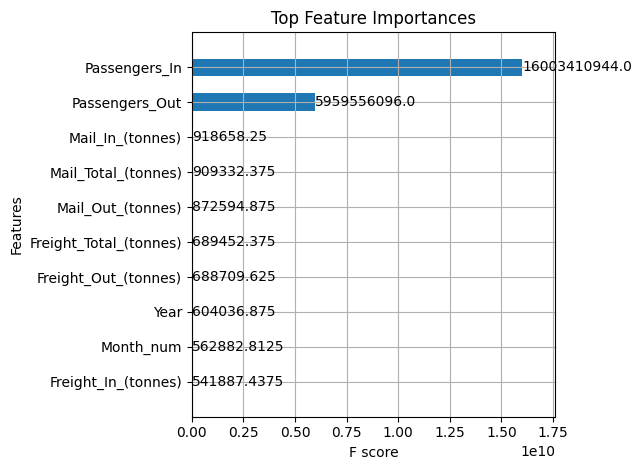

In [16]:
import matplotlib.pyplot as plt

xgb.plot_importance(xg_reg, max_num_features=10, importance_type='gain', height=0.5)
plt.title('Top Feature Importances')
plt.tight_layout()
plt.show()


In [17]:
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBRegressor

kf = KFold(n_splits=5, shuffle=True, random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R² score:", scores.mean())


Cross-validated R² scores: [0.99988115 0.99985844 0.99987698 0.9998709  0.99987507]
Average R² score: 0.9998725056648254


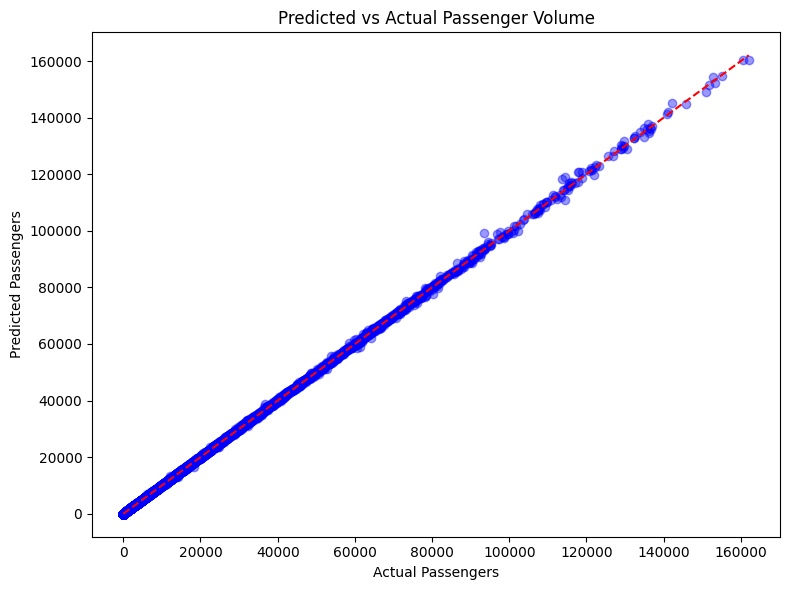

In [18]:
import matplotlib.pyplot as plt

# Fit model and predict
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Passengers')
plt.ylabel('Predicted Passengers')
plt.title('Predicted vs Actual Passenger Volume')
plt.tight_layout()
plt.show()


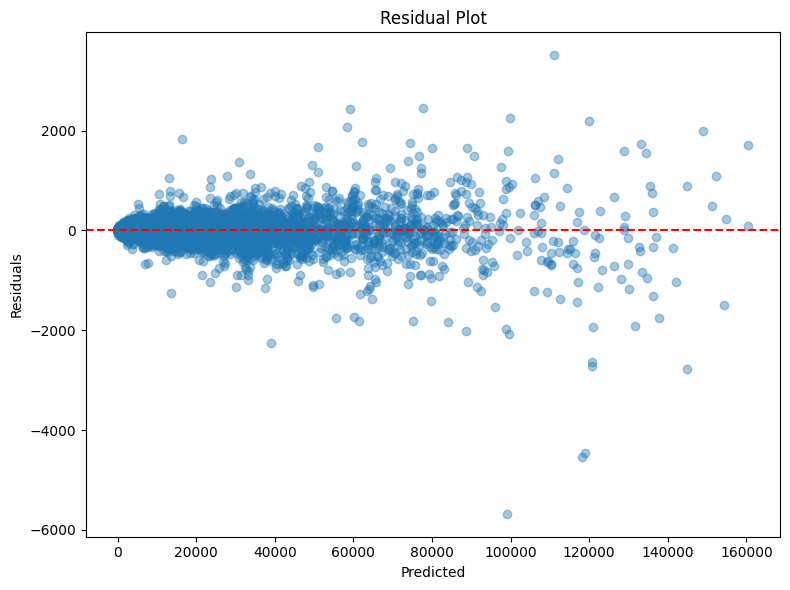

In [19]:
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.tight_layout()
plt.show()
